In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:

lr = 0.1
num_steps = 10000
n_hidden_1 = 2



In [3]:
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
y = np.array([0,1,0,1], np.float32)
y = np.reshape(y,[4,1])


In [4]:
tf.reset_default_graph()

In [5]:
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')

In [6]:
weights = {
    'W1': tf.Variable(tf.random_normal([2,n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1,1]),name='W2'),
    
}
#define the bias with zero initialization
biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[1]),name='b2'),
    
}

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
def neural_net(z):
    layer_1_out = tf.add(tf.matmul(z,weights['W1']), biases['b1'])
    layer_1_out = tf.nn.sigmoid(layer_1_out)
    out = tf.add(tf.matmul(layer_1_out,weights['W2']), biases['b2'])
    #out = tf.nn.sigmoid(out)
    return out

In [8]:
logits = neural_net(X)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y),name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)
logits = tf.round(tf.nn.sigmoid(logits))
correct_pred = tf.equal(logits,Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32), name = 'accuracy')
init = tf.global_variables_initializer()

In [9]:
acc = np.zeros(num_steps)
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        #fetch batch
        #batch_x = tf.reshape(x,shape = [-1,2])
        #batch_x = x
        #print(batch_x)
        #batch_y = tf.reshape(y,shape = [-1,1])
        #batch_y = y
        #print(batch_y)
        #run optimization  
        sess.run(train_op,feed_dict={X:x,Y:y})
        #acc = sess.run(accuracy,feed_dict={X:sess.run(batch_x),Y:sess.run(batch_y)})
        cost = sess.run(loss,feed_dict = {X:x,Y:y})
        acc[i] = sess.run(accuracy, feed_dict = {X:x,Y:y})
        if i % 1000 ==0:
            #print(sess.run(correct_pred, feed_dict = {X:x,Y:y}))
            #acc = sess.run(accuracy,feed_dict={X:x,Y:y})
            print("step "+str(i)+",Accuracy= {:.3f}".format(acc[i]))
            print("cost= {:.9f}".format(cost))

    print("Training finished!")
    result = sess.run(logits, feed_dict = {X:x})
    print("input:")
    print(x)
    print("output:")
    print(result)
    W = np.squeeze(sess.run(weights['W1']))
    b = np.squeeze(sess.run(biases['b1']))

step 0,Accuracy= 0.500
cost= 1.021490693
step 1000,Accuracy= 0.750
cost= 0.670848608
step 2000,Accuracy= 1.000
cost= 0.469832689
step 3000,Accuracy= 1.000
cost= 0.170016199
step 4000,Accuracy= 1.000
cost= 0.075584590
step 5000,Accuracy= 1.000
cost= 0.045631349
step 6000,Accuracy= 1.000
cost= 0.032078177
step 7000,Accuracy= 1.000
cost= 0.024539052
step 8000,Accuracy= 1.000
cost= 0.019788958
step 9000,Accuracy= 1.000
cost= 0.016540248
Training finished!
input:
[[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]]
output:
[[0.]
 [1.]
 [0.]
 [1.]]


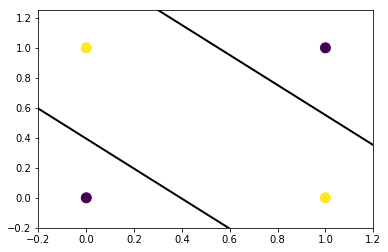

In [11]:
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y_1 = 1 / W[1][0] * (-W[0][0] * plot_x - b[0])
plot_y_2 = 1 / W[1][1] * (-W[0][1] * plot_x - b[1])
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y_1, color='k', linewidth=2)
plt.plot(plot_x, plot_y_2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

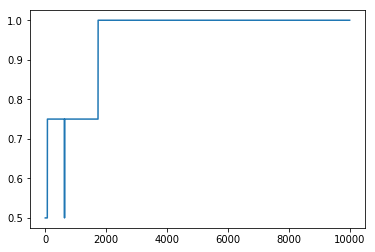

In [13]:
plt.plot(range(len(acc)),acc)
plt.show()